# Indenter-creation related

## Create bead from crystal

In [1]:
%env

{'LANG': 'C.UTF-8',
 'PATH': '/usr/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin',
 'HOME': '/home/testuser',
 'LOGNAME': 'testuser',
 'USER': 'testuser',
 'SHELL': '/bin/bash',
 'INVOCATION_ID': 'c1d5956e848449f18a4e6b83d854dd16',
 'JOURNAL_STREAM': '9:21757',
 'testuser': '19886',
 'ubuntu': '19885',
 'JPY_PARENT_PID': '967',
 'TERM': 'xterm-color',
 'CLICOLOR': '1',
 'PAGER': 'cat',
 'GIT_PAGER': 'cat',
 'MPLBACKEND': 'module://ipykernel.pylab.backend_inline'}

In [2]:
# data analysis 
import pandas as pd 
import numpy as np
import ase
#from asap3.analysis.rdf import RadialDistributionFunction

# file formats, input - output
import ase.io
from ase.io import read, write
#import parmed as pmd

# visualization
from ase.visualize import view
from ase.visualize.plot import plot_atoms

import nglview as nv
import matplotlib.pyplot as plt
import ipywidgets # just for jupyter notebooks

In [3]:
from IPython.display import Image

In [4]:
%matplotlib inline

In [5]:
# matplotlib settings

# expecially for presentation, larger font settings for plotting are recommendable
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure titlex

plt.rcParams["figure.figsize"] = (11,7) # the standard figure size

## (Re-)set nglview theme

In [6]:
from IPython.display import display
from nglview import theme

In [7]:
theme.reset()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
demoView = nv.demo(gui=True, theme='light')
demoView

NGLWidget()

## Create gold crystal

In [8]:
from ase.lattice.cubic import FaceCenteredCubic

In [9]:
from ase.build import fcc111

In [10]:
substrate = FaceCenteredCubic(
    'Au', 
    directions=[[1,-1,0],[1,1,-2],[1,1,1]], 
    latticeconstant=4.075,
    size=(51,30,16), 
    pbc=(1,1,1))

In [11]:
substrate_ref = fcc111('Au',size=(51,2*30,3*21),a=4.075,periodic=True)

In [12]:
substrate_ref_ortho = fcc111('Au',size=(51,2*30,3*21),a=4.075,periodic=True,orthogonal=True)

In [13]:
staticView = nv.show_ase(substrate)
staticView.remove_ball_and_stick()
staticView.add_spacefill()
staticView

NGLWidget()

In [14]:
view(substrate) # does not work, why?

In [15]:
write('substrate_ref.png',substrate_ref)

In [16]:
write('substrate_ref_ortho.png',substrate_ref_ortho)

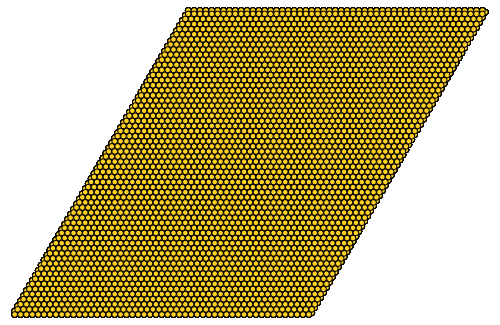

In [17]:
Image("substrate_ref.png")

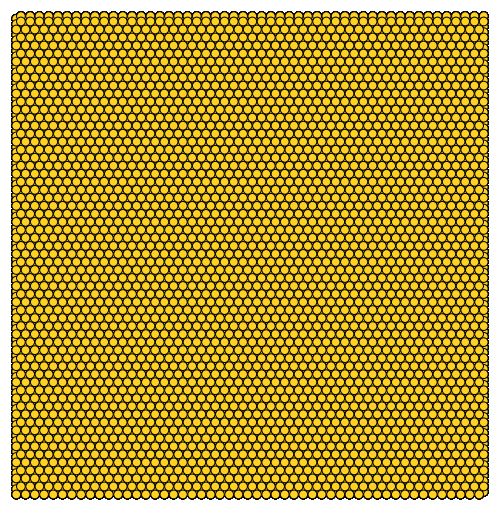

In [18]:
Image("substrate_ref_ortho.png")

In [19]:
substrate_ref_ortho.cell

array([[146.9544668 ,   0.        ,   0.        ],
       [  0.        , 149.72506053,   0.        ],
       [  0.        ,   0.        , 148.22024786]])

In [20]:
R = 25 # Ang

In [21]:
com = substrate_ref_ortho.get_center_of_mass()

In [22]:
# r = sqrt( (x-x0)^2 + (y-y0)^2 + (z-z0)^2 )

In [23]:
r = np.sqrt( np.sum((substrate_ref_ortho.get_positions() - com)**2,axis=1) )

In [24]:
ball =  substrate_ref_ortho[r <= R]

In [25]:
nv.show_ase(substrate_ref_ortho)

NGLWidget()

In [26]:
nv.show_ase(ball)

NGLWidget()

In [27]:
write('AU_111_r_25.xyz',ball)

## Rubbish

In [54]:
import os

In [56]:
os.getcwd()

'/mnt/dat/work/testuser/adsorption/N_surfactant_on_substrate_template/ipynb/prep'

In [57]:
os.listdir()

['20190426_interface_wf.ipynb',
 'test.png',
 '.ipynb_checkpoints',
 'AU_111_r_50.xyz',
 'surfactant_systems.ipynb',
 'indenter.ipynb',
 'substrate_ref.png',
 'substrate_ref_ortho.png']

In [58]:
os.path.abspath("AU_111_r_50.xyz")

'/mnt/dat/work/testuser/adsorption/N_surfactant_on_substrate_template/ipynb/prep/AU_111_r_50.xyz'

In [ ]:
fig, ax = plt.subplots()
plot_atoms(substrate, ax, radii=0.3, rotatiaon=('45x,45y,0z'))

In [4]:
test = read('./15Ang_amorph.cfg')

In [5]:
test

Atoms(symbols='He268', pbc=True, cell=[178.36391, 178.36391, 63.061166], masses=...)

In [6]:
test

Atoms(symbols='He268', pbc=True, cell=[178.36391, 178.36391, 63.061166], masses=...)

In [8]:
indenter100AngAmorph = read("100Ang_amorph.lammps", format="lammps-data")

In [10]:
view(indenter100AngAmorph,viewer='ngl')

HBox(children=(NGLWidget(), VBox(children=(Dropdown(description='Show', options=('All', 'H'), value='All'), FloatSlider(value=0.8, description='Ball size', max=1.5, step=0.01)))))

In [11]:
indenter100AngBend = read("100Ang_bend.lammps", format="lammps-data")

In [12]:
view(indenter100AngBend,viewer="ngl")

HBox(children=(NGLWidget(), VBox(children=(Dropdown(description='Show', options=('All', 'H'), value='All'), FloatSlider(value=0.8, description='Ball size', max=1.5, step=0.01)))))

In [13]:
indenter100AngStepped = read("100Ang_stepped.lammps", format="lammps-data")

In [14]:
view(indenter100AngStepped,viewer="ngl")

HBox(children=(NGLWidget(), VBox(children=(Dropdown(description='Show', options=('All', 'H'), value='All'), FloatSlider(value=0.8, description='Ball size', max=1.5, step=0.01)))))